<a href="https://colab.research.google.com/github/anuska123gupta/python_code/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and inspect data set


In [ ]:
import pandas as pd

# Load dataset
# Make sure the file '7817_1.csv' is in the correct location or provide the full path to the file.
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file name is '7817_1.csv'
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)


# Inspect
print(df.shape)          # Shape of dataset
print(df.columns)        # Column names
print(df.head())         # First few rows
print(df.isnull().sum()) # Missing values
print(df.duplicated().sum()) # Duplicate rows

Saving 7817_1.csv to 7817_1 (1).csv
(1597, 27)
Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateU

#Data Cleaning

In [ ]:
# Keep only required columns
df = df[['reviews.text', 'reviews.rating', 'reviews.doRecommend', 'reviews.numHelpful']]

# Drop missing values in text and rating
df = df.dropna(subset=['reviews.text', 'reviews.rating'])

# Remove duplicates
df = df.drop_duplicates(subset=['reviews.text'])

# Optional: normalize column names
df.columns = ['text', 'rating', 'doRecommend', 'numHelpful']


#Create Sentiment Analysis

In [ ]:
# Function to categorize sentiment
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply function
df['sentiment'] = df['rating'].apply(get_sentiment)


#Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # remove stopwords + lemmatize
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#Exploratory Data Analysis Process (EDA)


A. Sentiment Distribution

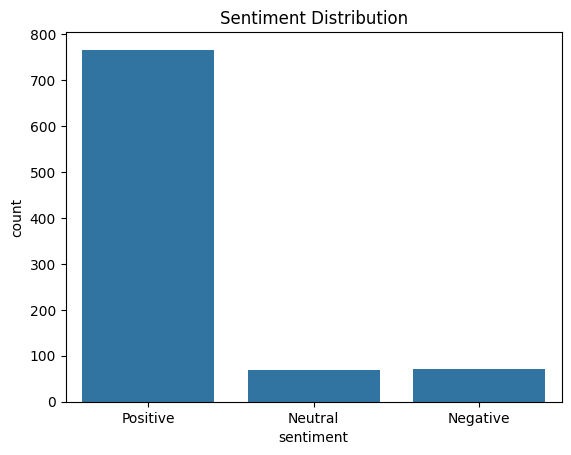

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


B. Review Length Analysis

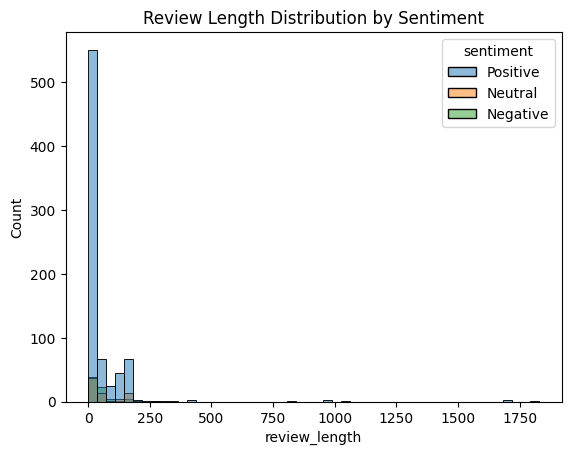

In [ ]:
df['review_length'] = df['clean_text'].apply(lambda x: len(x.split()))

sns.histplot(df, x='review_length', hue='sentiment', bins=50)
plt.title('Review Length Distribution by Sentiment')
plt.show()


C. Word Frequency / Word Cloud

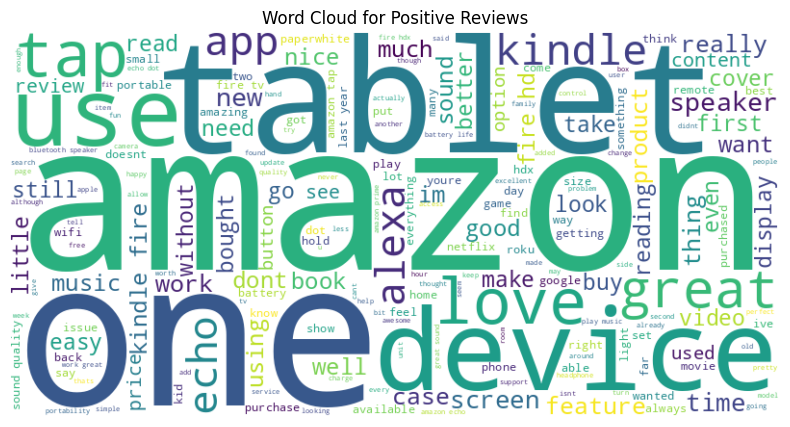

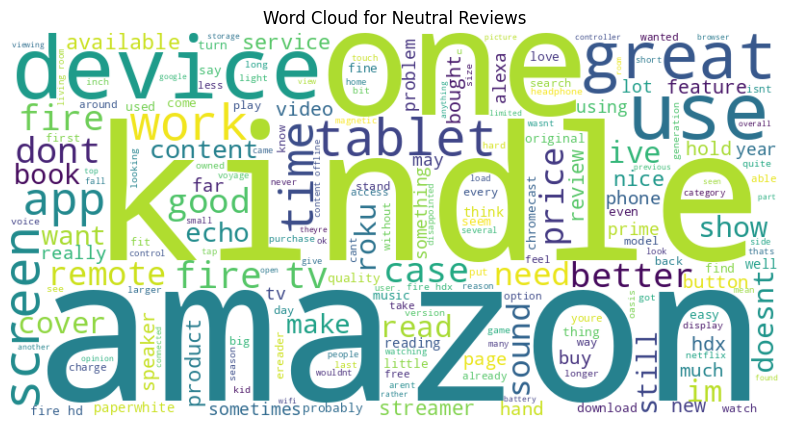

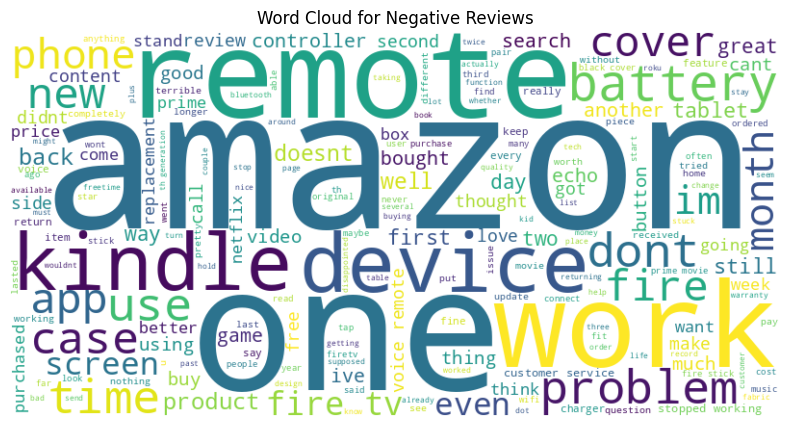

In [ ]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()


D. Correlation Insights

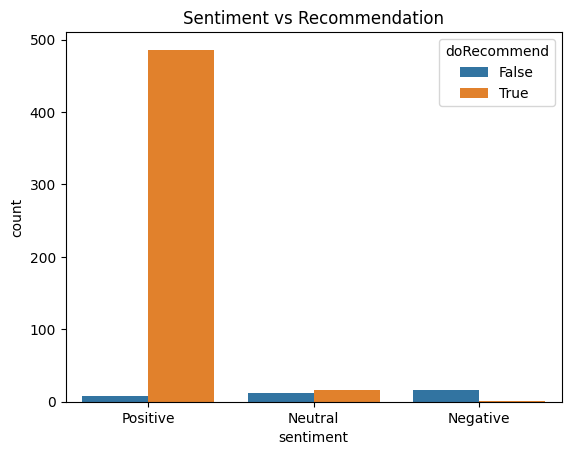

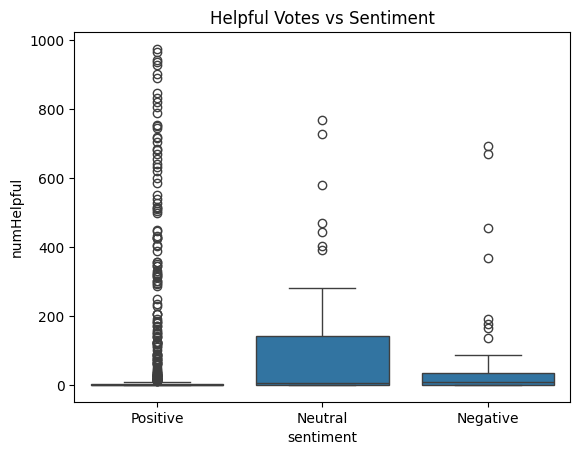

In [ ]:
# doRecommend vs sentiment
sns.countplot(x='sentiment', hue='doRecommend', data=df)
plt.title('Sentiment vs Recommendation')
plt.show()

# numHelpful vs sentiment
sns.boxplot(x='sentiment', y='numHelpful', data=df)
plt.title('Helpful Votes vs Sentiment')
plt.show()


#N-gram Analysis (Bigrams and Trigram)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(2,3), top_n=15):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

for sentiment in ['Positive', 'Neutral', 'Negative']:
    corpus = df[df['sentiment']==sentiment]['clean_text']
    print(f"\nTop Bigrams & Trigrams for {sentiment} Reviews:")
    top_ngrams = get_top_ngrams(corpus)
    for ngram, freq in top_ngrams:
        print(f"{ngram} → {freq}")



Top Bigrams & Trigrams for Positive Reviews:
sound quality → 59
amazon tap → 54
bluetooth speaker → 47
kindle hd → 46
amazon prime → 42
battery life → 39
work great → 38
amazon echo → 37
echo dot → 36
great sound → 35
play music → 34
ipad mini → 32
year model → 32
easy use → 30
kindle paperwhite → 29

Top Bigrams & Trigrams for Neutral Reviews:
content offline → 6
living room → 6
amazon prime → 5
want read → 5
work great → 5
th generation → 5
echo dot → 5
ability watch → 4
watch content → 4
kindle like → 4
ability watch content → 4
watch content offline → 4
inch tv → 4
battery life → 4
great sound → 4

Top Bigrams & Trigrams for Negative Reviews:
voice remote → 9
stopped working → 8
customer service → 8
new kindle → 5
prime movie → 5
black cover → 5
prime content → 4
doesnt work → 4
th generation → 4
echo dot → 4
screen protector → 4
replacement remote → 4
battery life → 3
aa battery → 3
netflix app → 3
